In [1]:
import numpy as np
import pandas as pd
import plots

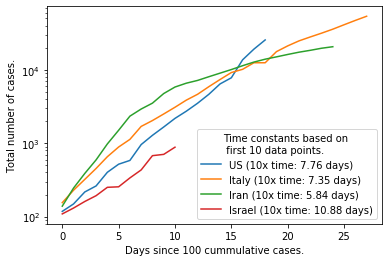

In [9]:
plots.semilog_cases_since(["US","Italy","Iran","Israel"],
                          num_cases=100,
                          time_constant_type=10,
                          num_datapoints_fit=10,
                          fit_first_last="first")

A total of 166 countries confirmed at least one case of covid-19
Mean death rate for US: 0.0114 (+-0.0188 std)
Mean death rate for Italy: 0.0295 (+-0.0305 std)


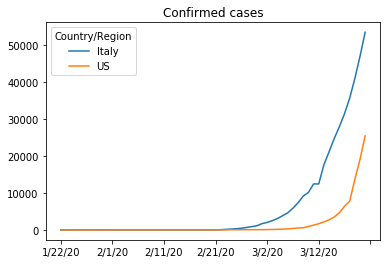

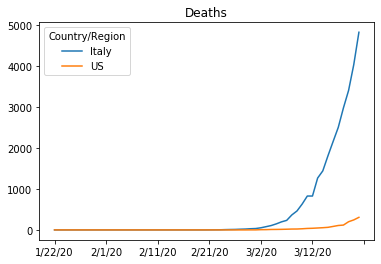

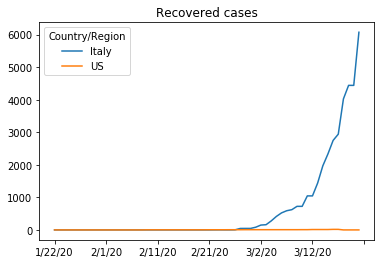

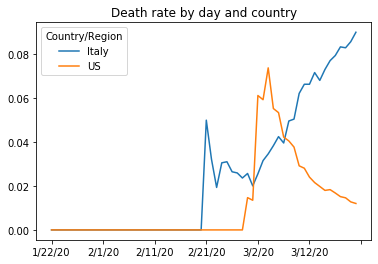

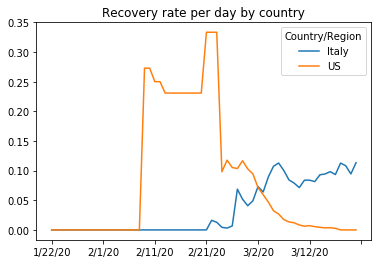

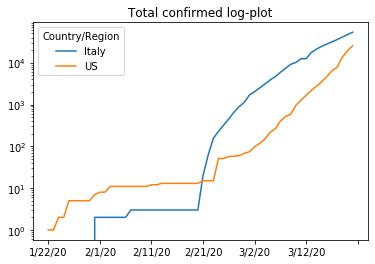

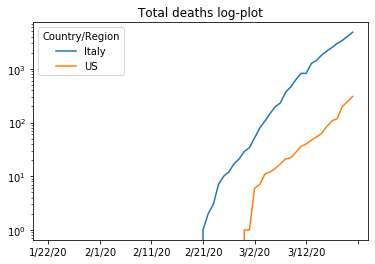

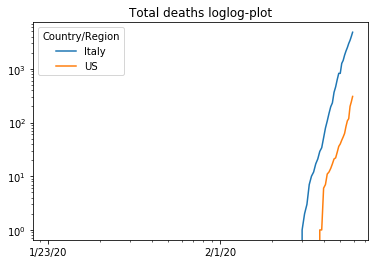

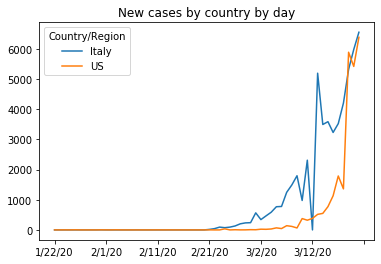

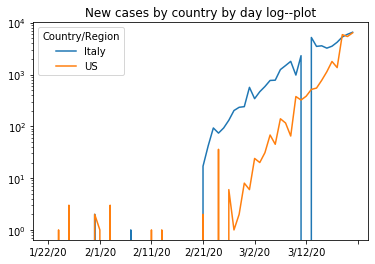

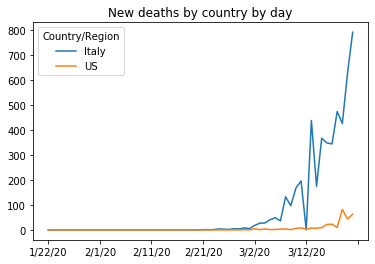

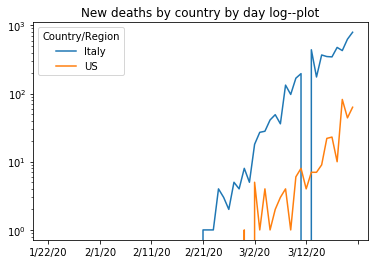

In [3]:
plots.generate_all_plots(["US","Italy"])